# Análise de Estátisticas de Canais de Youtube BR

## Carregando bibliotecas e preparando arquivo

In [46]:
# Carregando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import nbformat as nb
import chardet
import locale as lcl
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Indentificando enconding do arquivo
with open("Global YouTube Statistics.csv", 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")

df = pd.read_csv("Global YouTube Statistics.csv", encoding=encoding, sep=",")


Detected encoding: ISO-8859-1


In [3]:
# Importando bd
df = pd.read_csv("Global YouTube Statistics.csv" , encoding="ISO-8859-1", sep = ",")
print("DataSet de Análise de Estatísticas de Canais de YTBR")
display(df)

DataSet de Análise de Estatísticas de Canais de YTBR


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [4]:
# Configurando Pandas 
pd.set_option('display.float_format', lambda x: '%.3f' % x) # alterar a visualização de float64

# Define a localidade para adicionar o separador de milhares
lcl.setlocale(lcl.LC_ALL, '')

'Portuguese_Brazil.1252'

## Visão Geral do dataset


In [5]:
# Informações sobre o dataset
print("Informações sobre o Dataset - Tipos de Variáveis")
display(df.info())

Informações sobre o Dataset - Tipos de Variáveis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  v

None

In [6]:
# Informações sobre as colunas do dataset
print(f"O data frame possui {df.shape[0]} linhas e {df.shape[1]} colunas")

numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numericas = df.select_dtypes(include=numerics)

nao_numericas = df.select_dtypes(exclude=numerics)

print(f"Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas.")

O data frame possui 995 linhas e 28 colunas
Temos 21 colunas numéricas e 7 colunas não-numéricas.


In [7]:
# Estatísticas descritivas
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.000,995.000,995.000,995.000,994.000,879.000,962.000,939.000,995.000,995.000,...,995.000,658.000,990.000,990.000,872.000,872.000,872.000,872.000,872.000,872.000
mean,498.000,22982412.060,11039537052.038,9187.126,554248.904,386.053,745.719,175610284.794,36886.148,589807.848,...,7081813.920,349079.132,2012.630,15.746,63.628,430387266.752,9.279,224214981.632,26.633,-14.128
std,287.376,17526105.341,14110844376.830,34151.352,1362782.210,1232.245,1944.387,416378166.207,71858.724,1148622.478,...,13797037.615,614355.441,4.513,8.778,26.107,472794722.465,4.888,154687362.709,20.561,84.761
min,1.000,12300000.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,...,0.000,1.000,1970.000,1.000,7.600,202506.000,0.750,35588.000,-38.416,-172.105
25%,249.500,14500000.000,4288145410.000,194.500,323.000,11.000,27.000,20137500.000,2700.000,43500.000,...,521750.000,100000.000,2009.000,8.000,36.300,83355411.000,5.270,55908316.000,20.594,-95.713
50%,498.000,17700000.000,7760819588.000,729.000,915.500,51.000,65.500,64085000.000,13300.000,212700.000,...,2600000.000,200000.000,2013.000,16.000,68.000,328239523.000,9.365,270663028.000,37.090,-51.925
75%,746.500,24600000.000,13554701853.000,2667.500,3584.500,123.000,139.750,168826500.000,37900.000,606800.000,...,7300000.000,400000.000,2016.000,23.000,88.200,328239523.000,14.700,270663028.000,37.090,78.963
max,995.000,245000000.000,228000000000.000,301308.000,4057944.000,7741.000,7741.000,6589000000.000,850900.000,13600000.000,...,163400000.000,8000000.000,2022.000,31.000,113.100,1397715000.000,14.720,842933962.000,61.924,138.253


In [8]:
# Verificando erros na bd e nulls
df['created_year'].min() # O Youtube foi criado em 2005
df.isnull().sum()

# verificando se há linhas duplicadas
df[df.duplicated()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [9]:
# Removendo erros e NA's
df = df.dropna()
df.drop(df.loc[df['created_year'] == 1970].index, inplace=True)

In [10]:
# Contagem de quantos valores diferentes existem em cada variável
contagens_distintas = []

for coluna in df.columns:
    dados = {'Variavel': coluna, 'Contagens_Distintas': df[coluna].nunique()}
    contagens_distintas.append(dados)

contagem = pd.DataFrame(contagens_distintas)
print(contagem)

                                   Variavel  Contagens_Distintas
0                                      rank                  553
1                                  Youtuber                  553
2                               subscribers                  238
3                               video views                  553
4                                  category                   17
5                                     Title                  551
6                                   uploads                  507
7                                   Country                   42
8                              Abbreviation                   42
9                              channel_type                   14
10                         video_views_rank                  551
11                             country_rank                  180
12                        channel_type_rank                  187
13         video_views_for_the_last_30_days                  551
14                  lowes

In [11]:
# Filtrando Dataset para o Brasil
df_Brazil = df.loc[df["Country"] == "Brazil"]
display(df_Brazil.head())

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
54,55,Felipe Neto,45200000,16602198273.000,Entertainment,Felipe Neto,4331,Brazil,BR,Entertainment,...,200000.000,2006.000,May,16.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
55,56,Vocï¿½ï¿½ï¿½,44700000,7828610828.000,Entertainment,Vocï¿½ï¿½ï¿½,1558,Brazil,BR,Entertainment,...,100000.000,2013.000,Sep,1.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
83,84,GR6 EXPLODE,38900000,25154232306.000,Music,GR6 EXPLODE,3043,Brazil,BR,Music,...,100000.000,2014.000,Aug,5.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
96,97,Maria Clara & JP,37000000,24188861917.000,People & Blogs,Maria Clara & JP,744,Brazil,BR,Entertainment,...,300000.000,2015.000,Sep,6.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
120,121,Galinha Pintadinha,33800000,27274550757.000,Film & Animation,Galinha Pintadinha,66,Brazil,BR,Film,...,200000.000,2006.000,Aug,30.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925


In [12]:
# Informações sobre o data set do Brasil
print("Descrição de Informações do Dataset")
df_Brazil = df.loc[df["Country"] == "Brazil"]
display(df_Brazil.describe())
print(f"O data frame do Brasil possui {df_Brazil.shape[0]} linhas e {df_Brazil.shape[1]} colunas")

Descrição de Informações do Dataset


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,...,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000
mean,524.061,20706060.606,8782897236.121,2340.212,2758.121,28.455,72.242,373334181.818,46757.576,744248.485,...,8978787.879,218181.818,2012.636,15.818,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
std,293.486,9353139.159,6892709483.288,1764.908,7762.933,16.570,53.829,1080382538.690,76522.913,1214971.058,...,14693062.937,250567.538,3.287,9.910,0.000,0.000,0.000,0.000,0.000,0.000
min,55.000,12300000.000,1796227417.000,66.000,54.000,2.000,2.000,27340000.000,0.000,0.000,...,0.000,100000.000,2006.000,1.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
25%,334.000,14000000.000,3828000587.000,1077.000,338.000,15.000,27.000,48032000.000,11000.000,176500.000,...,2100000.000,100000.000,2011.000,6.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
50%,543.000,16900000.000,5956193599.000,1558.000,1066.000,29.000,56.000,87804000.000,20700.000,331600.000,...,4000000.000,100000.000,2013.000,16.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
75%,802.000,21600000.000,11627437847.000,3956.000,2033.000,44.000,120.000,213700000.000,48300.000,772700.000,...,9300000.000,200000.000,2015.000,26.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
max,991.000,45200000.000,27274550757.000,6262.000,45213.000,55.000,172.000,6148000000.000,408700.000,6500000.000,...,78500000.000,1100000.000,2020.000,30.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925


O data frame do Brasil possui 33 linhas e 28 colunas


In [13]:
# Contagem de quantos valores diferentes existem em cada variável no dataset do Brasil
contagens_distintas_br = []

for coluna in df_Brazil.columns:
    dados = {'Variavel': coluna, 'Contagens_Distintas': df_Brazil[coluna].nunique()}
    contagens_distintas_br.append(dados)

contagem_br = pd.DataFrame(contagens_distintas_br)
print(f"O data frame do Brasil possui {df_Brazil.shape[0]} linhas e {df_Brazil.shape[1]} colunas")
print(contagem_br)


# Extrair informações específicas
total_canais = contagem_br[contagem_br['Variavel'] == 'Youtuber']['Contagens_Distintas'].values[0]
total_categorias = contagem_br[contagem_br['Variavel'] == 'category']['Contagens_Distintas'].values[0]
total_anos_criacao = contagem_br[contagem_br['Variavel'] == 'created_year']['Contagens_Distintas'].values[0]
total_tipos_canais = contagem_br[contagem_br['Variavel'] == 'channel_type']['Contagens_Distintas'].values[0]

# Usar as informações em outras partes do código
print(f"Há {total_canais} canais diferentes na base de dados. Cada registro corresponde a um canal.")
print(f"Há {total_categorias} categorias diferentes de canais.")
print(f"Os canais foram criados em {total_anos_criacao} anos diferentes.")
print(f"Há {total_tipos_canais} diferentes tipos de canais.")

O data frame do Brasil possui 33 linhas e 28 colunas
                                   Variavel  Contagens_Distintas
0                                      rank                   33
1                                  Youtuber                   33
2                               subscribers                   32
3                               video views                   33
4                                  category                   10
5                                     Title                   33
6                                   uploads                   33
7                                   Country                    1
8                              Abbreviation                    1
9                              channel_type                    8
10                         video_views_rank                   33
11                             country_rank                   32
12                        channel_type_rank                   29
13         video_views_for_the_last_3

Ao filtrar a base de dados para o contexto brasileiro, identificamos 33 canais únicos que abrangem um total de 10 categorias distintas, refletindo a variedade temática presente na plataforma.

Os registros também revelam que esses canais foram criados ao longo de 12 anos, destacando a evolução temporal da presença de criadores no YouTube brasileiro.

Além disso, observamos a existência de 8 diferentes tipos de canais, indicando a presença de uma ampla gama de formatos e abordagens adotadas pelos produtores de conteúdo na plataforma. Essa diversidade de tipos de canais contribui para a riqueza e complexidade do cenário de criadores de conteúdo no YouTube.

## Análise Descritiva

### Canais Criados

In [14]:
# Criando um dataframe
canais_por_ano = df_Brazil['created_year'].value_counts().reset_index().sort_values(by='created_year', ascending=True)
canais_por_ano.columns = ['Ano', 'Quantidade de Canais']
canais_por_ano

# Calculando a soma cumulativa 
canais_por_ano['Quantidade acumulada'] = canais_por_ano['Quantidade de Canais'].cumsum()
canais_por_ano['Ano'] = canais_por_ano['Ano'].astype(int) # Convertendo a variável 'Ano' para inteiro
canais_por_ano

,Ano,Quantidade de Canais,Quantidade acumulada
4,2006,3,3
8,2007,1,4
6,2010,3,7
5,2011,3,10
3,2012,4,14
0,2013,5,19
1,2014,5,24
2,2015,5,29
9,2016,1,30
11,2017,1,31


In [15]:
metade_total = canais_por_ano['Quantidade de Canais'].sum() / 2
ano_metade = canais_por_ano[canais_por_ano['Quantidade acumulada'] >= metade_total]['Ano'].iloc[0]
print(f"Metade dos canais de sucesso no Brasil foi criado até o ano de {ano_metade}.")

Metade dos canais de sucesso no Brasil foi criado até o ano de 2013.


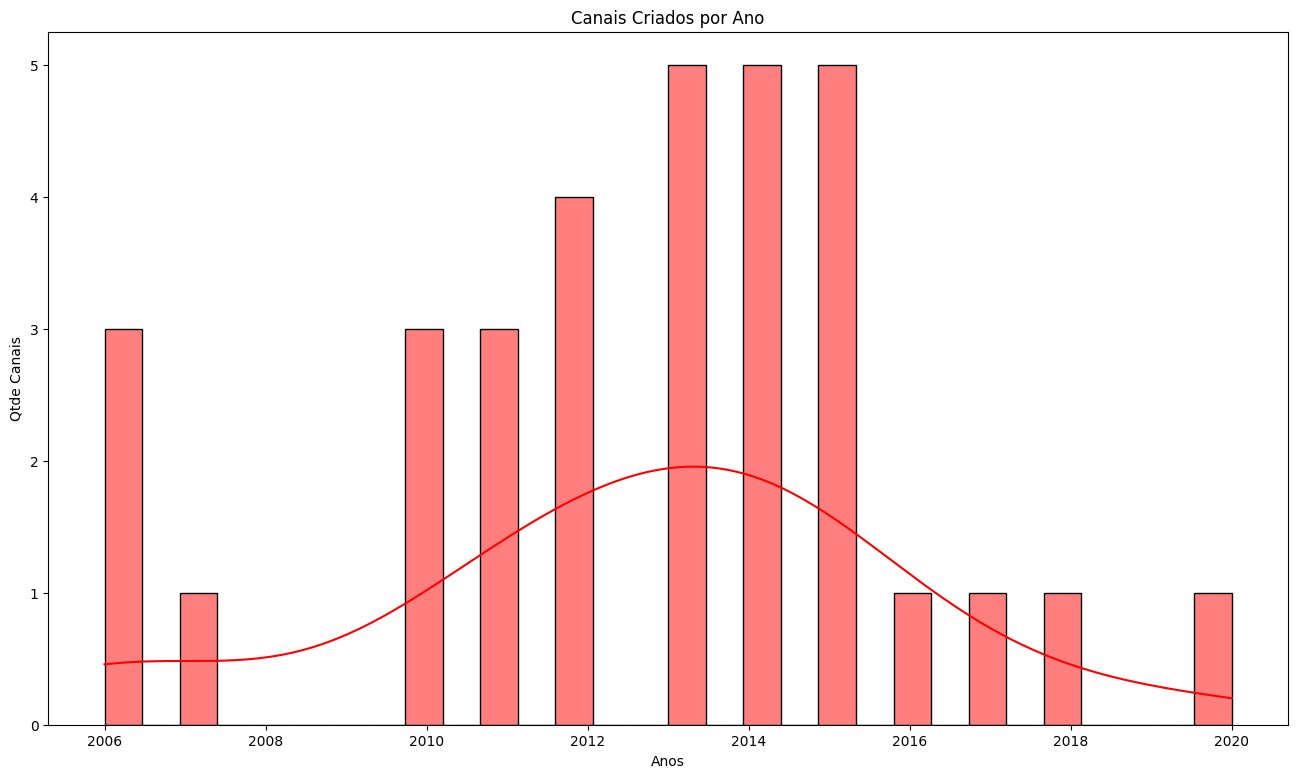

In [16]:
# Plotando Canais Criados no YTBR por Ano
plt.figure(figsize=(16, 9))
sns.histplot(df_Brazil['created_year'], bins=30, color='red', kde=True)
plt.title('Canais Criados por Ano')
plt.xlabel('Anos')
plt.ylabel('Qtde Canais')

plt.show()

Ao examinar a progressão temporal da comunidade de criadores de conteúdo no YouTube brasileiro, é importante reconhecer a limitação de nossa base de dados devido à quantidade de canais registrados e à falta de informações sobre os canais criados nos anos de 2008, 2009 e 2019. 

Apesar dessas lacunas, a análise dos dados disponíveis ainda pode oferecer perspectivas esclarecedoras sobre o crescimento e as tendências gerais da plataforma ao longo do tempo proporcionando uma compreensão dos aspectos significativos do cenário do YouTube no Brasil.

### Categorias

In [17]:
# Canais por categoria
canais_por_categoria = df_Brazil['category'].value_counts().reset_index()
canais_por_categoria.columns = ['categoria', 'Quantidade de Canais Totais']
canais_por_categoria['% Canais por Categoria'] = (canais_por_categoria['Quantidade de Canais Totais'] / canais_por_categoria['Quantidade de Canais Totais'].sum()) * 100

canais_por_categoria

,categoria,Quantidade de Canais Totais,% Canais por Categoria
0,Entertainment,8,24.242
1,Music,7,21.212
2,Film & Animation,5,15.152
3,Comedy,4,12.121
4,People & Blogs,3,9.091
5,Gaming,2,6.061
6,Autos & Vehicles,1,3.030
7,Howto & Style,1,3.030
8,Nonprofits & Activism,1,3.030
9,Sports,1,3.030


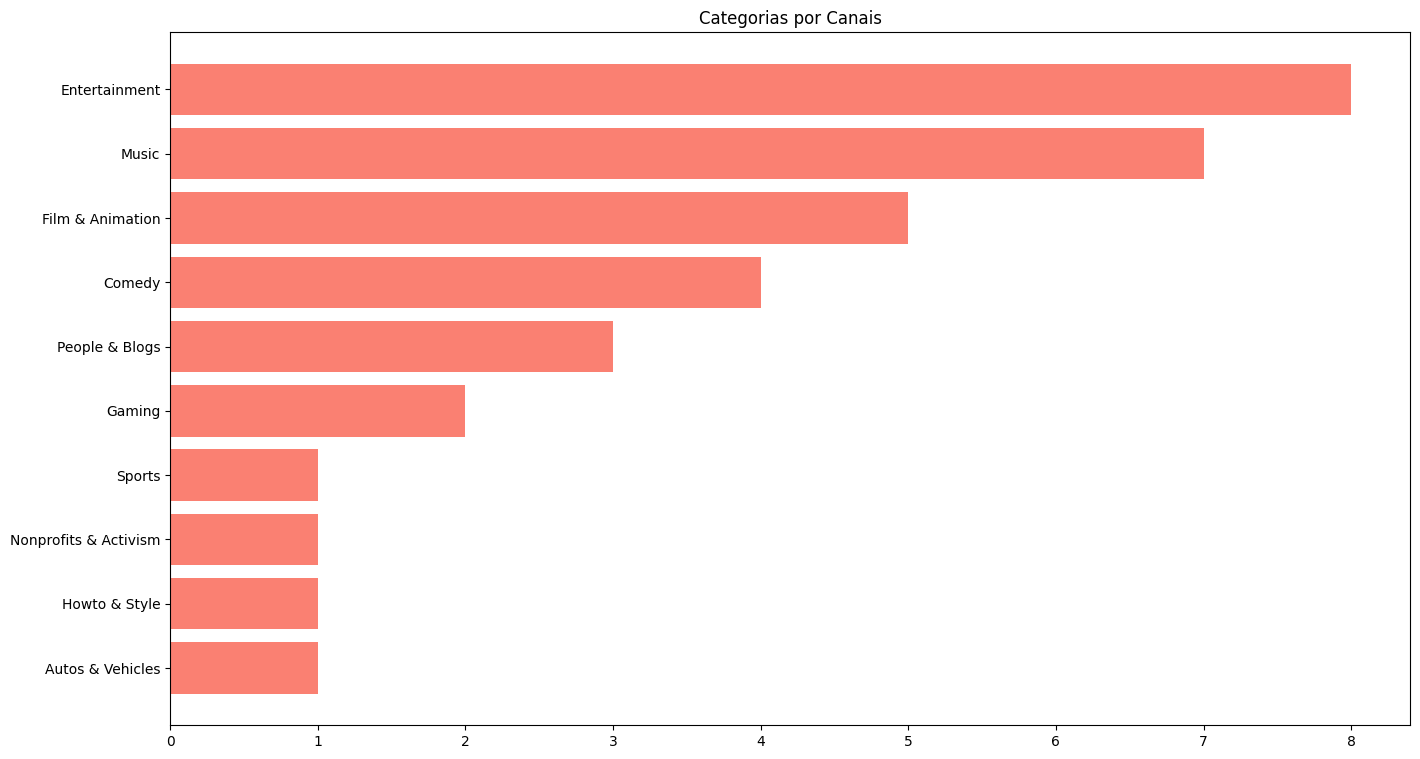

In [24]:
# Plotando Canais por categoria
plt.figure(figsize=(16, 9))
canais_por_categoria = canais_por_categoria.sort_values(by='Quantidade de Canais Totais', ascending=True)
plt.barh(canais_por_categoria['categoria'], canais_por_categoria['Quantidade de Canais Totais'], color='salmon')
plt.title('Categorias por Canais')
plt.show()

A análise minuciosa da quantidade de canais por categoria revela uma diversidade no conteúdo do YouTube no Brasil. "Entertainment" e "Music" lideram em quantidade, representando aproximadamente 45% do total, sugerindo uma forte presença de entretenimento e música. Categorias como "Film & Animation" e "Comedy" também têm uma presença significativa. Por outro lado, "Gaming" e categorias como "Autos & Vehicles", "Howto & Style", "Nonprofits & Activism" e "Sports" têm uma presença mais limitada, indicando menor representatividade nessas áreas específicas. Essa distribuição reflete as tendências e preferências dos criadores de conteúdo e da audiência na plataforma.

### Inscritos

In [19]:
# Canais por número de inscritos
maiores_canaisbr_por_inscritos = df_Brazil[['Youtuber', 'subscribers', 'category']].sort_values('subscribers', ascending=False).head(10).reset_index(drop=True)
maiores_canaisbr_por_inscritos.rename(columns={'Youtuber': 'Canal', 'subscribers': 'Inscritos', 'category' : 'Categoria'}, inplace=True)
maiores_canaisbr_por_inscritos['Inscritos_Milhoes'] = (maiores_canaisbr_por_inscritos['Inscritos'] / 1000000)

maiores_canaisbr_por_inscritos.head(10)

,Canal,Inscritos,Categoria,Inscritos_Milhoes
0,Felipe Neto,45200000,Entertainment,45.200
1,Vocï¿½ï¿½ï¿½,44700000,Entertainment,44.700
2,GR6 EXPLODE,38900000,Music,38.900
3,Maria Clara & JP,37000000,People & Blogs,37.000
4,Galinha Pintadinha,33800000,Film & Animation,33.800
5,Enaldinho,29200000,Comedy,29.200
6,Renato Garcia YT,26900000,Entertainment,26.900
7,Spider Slack,24000000,Comedy,24.000
8,DUDU e CAROL,21600000,Autos & Vehicles,21.600
9,Rafa & Luiz,21000000,Entertainment,21.000


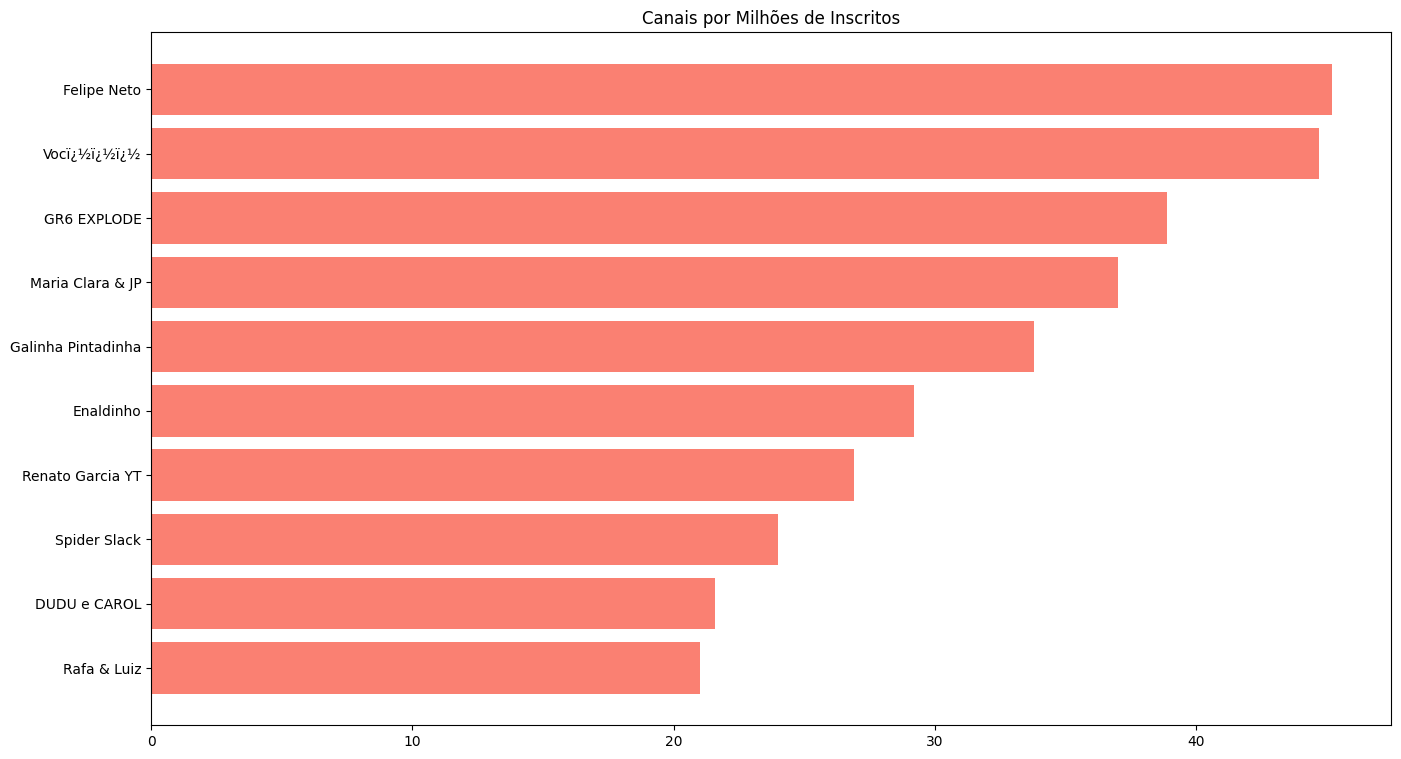

In [25]:
# Plotando Canais por Número de Inscritos
plt.figure(figsize=(16, 9))
maiores_canaisbr_por_inscritos = maiores_canaisbr_por_inscritos.sort_values(by='Inscritos_Milhoes', ascending=True)
plt.barh(maiores_canaisbr_por_inscritos['Canal'], maiores_canaisbr_por_inscritos['Inscritos_Milhoes'], color='salmon')
plt.title('Canais por Milhões de Inscritos')
plt.show()

In [21]:
# Categorias com mais inscritos
inscritos_por_categoria = df_Brazil.groupby('category')['subscribers'].sum().reset_index()
inscritos_por_categoria = inscritos_por_categoria.sort_values(by='subscribers', ascending=False)
inscritos_por_categoria['Inscritos_Milhoes'] = (inscritos_por_categoria['subscribers'] / 1000000)
inscritos_por_categoria

,category,subscribers,Inscritos_Milhoes
2,Entertainment,201500000,201.500
6,Music,135000000,135.000
3,Film & Animation,103100000,103.100
1,Comedy,83100000,83.100
8,People & Blogs,63000000,63.000
4,Gaming,28800000,28.800
0,Autos & Vehicles,21600000,21.600
5,Howto & Style,18000000,18.000
7,Nonprofits & Activism,16900000,16.900
9,Sports,12300000,12.300


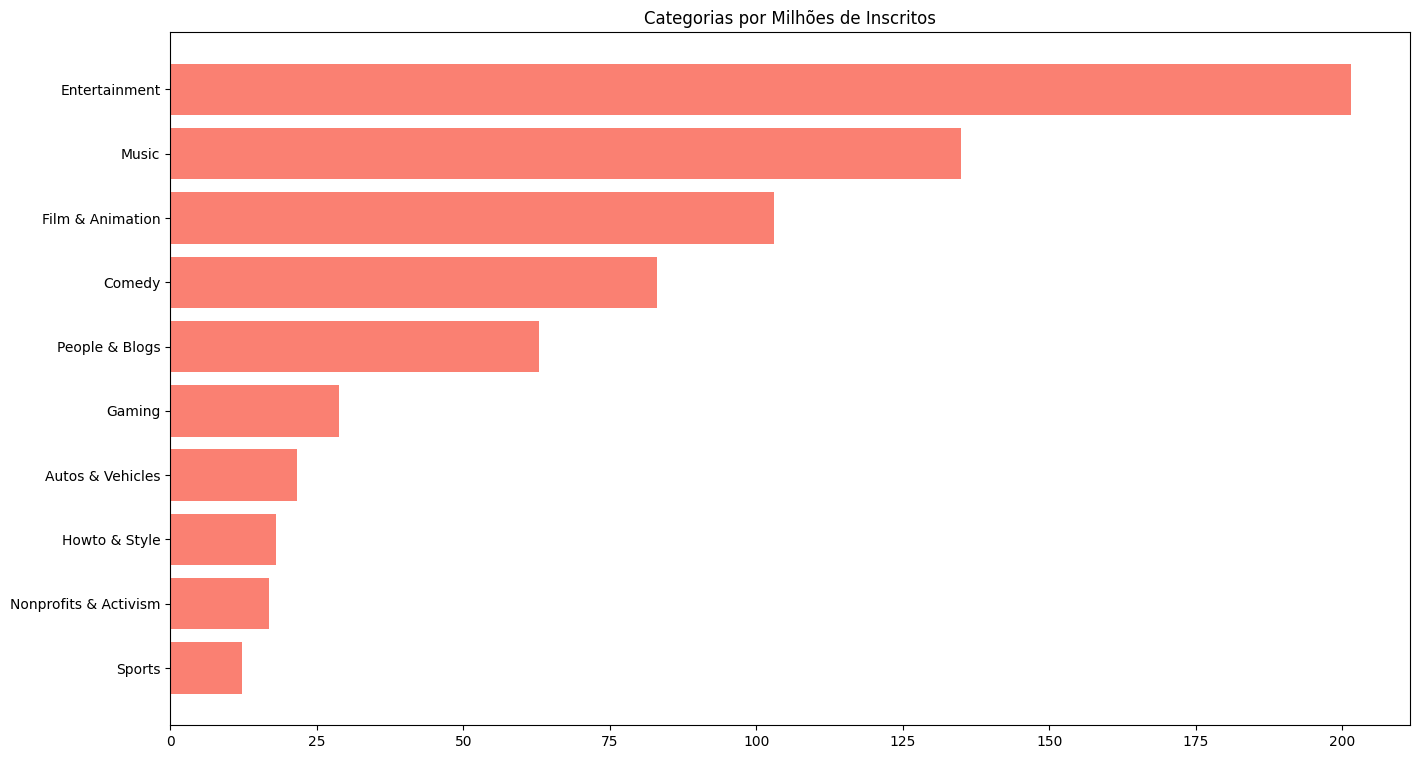

In [27]:
# Plotando Categorias por Número de Inscritos
plt.figure(figsize=(16, 9))
inscritos_por_categoria = inscritos_por_categoria.sort_values(by='Inscritos_Milhoes', ascending=True)
plt.barh(inscritos_por_categoria['category'], inscritos_por_categoria['Inscritos_Milhoes'], color='salmon')
plt.title('Categorias por Milhões de Inscritos')
plt.show()

A análise conjunta das tabelas de inscritos revela que o cenário do YouTube no Brasil é dominado por canais nas categorias "Entertainment", "Music" e "Film & Animation", que apresentam os maiores números de inscritos. Nesse sentido, canais  como Felipe Neto, Vocï¿½ï¿½ï¿½	, GR6 EXPLODE e Galinha Pintadinha destacam-se em suas respectivas categorias como aqueles com maior número de inscritos.

As categorias "Comedy" e "People & Blogs" também têm uma presença significativa. Por outro lado, categorias como "Gaming", "Autos & Vehicles", "Howto & Style", "Nonprofits & Activism" e "Sports" têm representações mais modestas em termos de inscritos. Essa diversidade reflete as preferências e interesses variados da audiência brasileira no YouTube.

### Visualizações

In [28]:
# Canais com mais visualizações
maiores_canaisbr_por_views = df_Brazil[['Youtuber', 'video views', 'category']].sort_values('video views', ascending=False).head(10).reset_index(drop=True)
maiores_canaisbr_por_views.rename(columns={'Youtuber': 'Canal', 'video views': 'Visualizacoes', 'category' : 'Categoria'}, inplace=True)
maiores_canaisbr_por_views['Views_Bilhoes'] = (maiores_canaisbr_por_views['Visualizacoes'] / 1000000000)
maiores_canaisbr_por_views

,Canal,Visualizacoes,Categoria,Views_Bilhoes
0,Galinha Pintadinha,27274550757.000,Film & Animation,27.275
1,GR6 EXPLODE,25154232306.000,Music,25.154
2,Maria Clara & JP,24188861917.000,People & Blogs,24.189
3,Mundo Bita,16690788752.000,Music,16.691
4,Felipe Neto,16602198273.000,Entertainment,16.602
5,Spider Slack,13943030228.000,Comedy,13.943
6,Gusttavo Lima Oficial,13917423958.000,Music,13.917
7,Turma da Mï¿½ï¿½,13824277846.000,Film & Animation,13.824
8,Enaldinho,11627437847.000,Comedy,11.627
9,O Reino Infantil,11182302317.000,Music,11.182


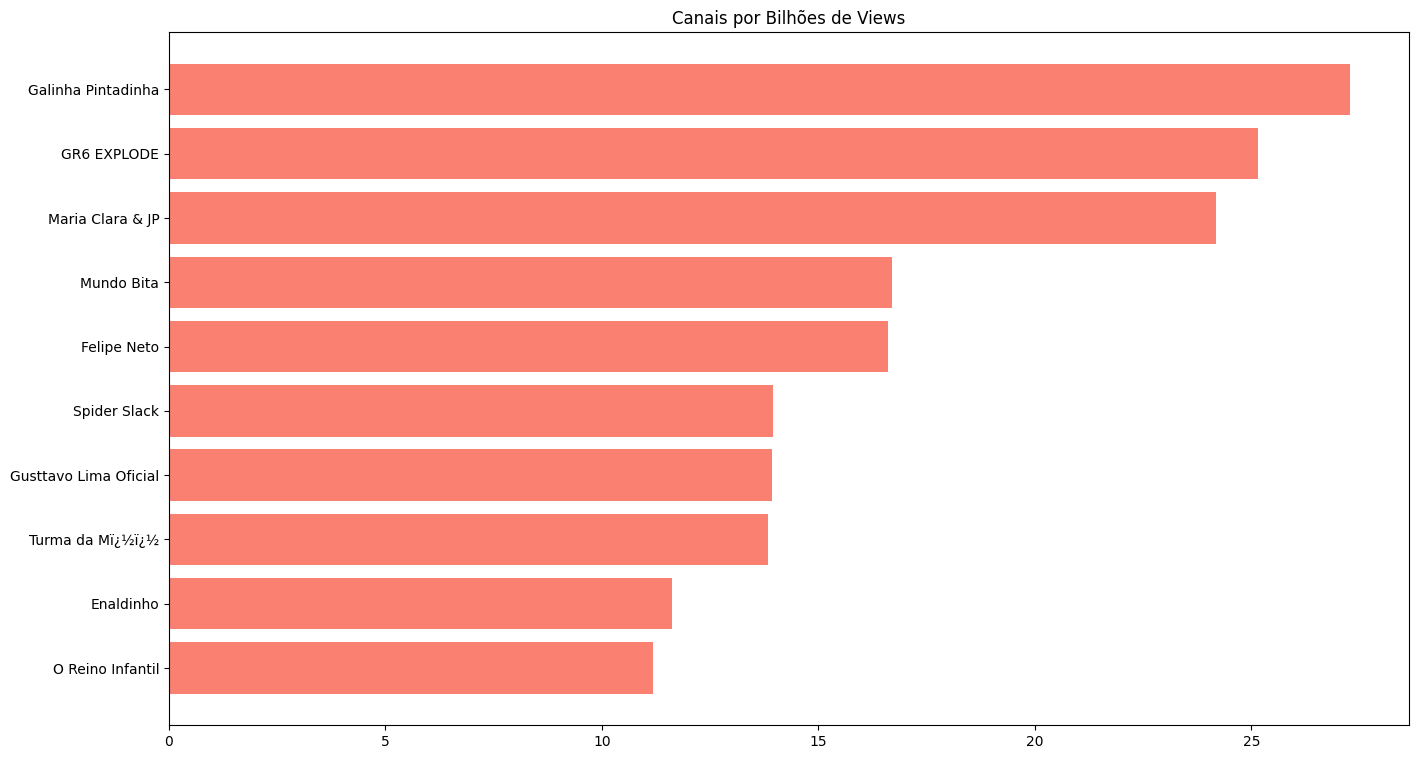

In [30]:
# Plotando Canais por Número de Views
plt.figure(figsize=(16, 9))
maiores_canaisbr_por_views = maiores_canaisbr_por_views.sort_values(by='Views_Bilhoes', ascending=True)
plt.barh(maiores_canaisbr_por_views['Canal'], maiores_canaisbr_por_views['Views_Bilhoes'], color='salmon')
plt.title('Canais por Bilhões de Views')
plt.show()

In [31]:
# Categorias por número de views
views_por_categoria = df_Brazil.groupby('category')['video views'].sum().reset_index()
views_por_categoria = views_por_categoria.sort_values(by='video views', ascending=False)
views_por_categoria['Views_Bilhoes'] = (views_por_categoria['video views'] / 1000000000)
views_por_categoria

,category,video views,Views_Bilhoes
6,Music,83736838443.000,83.737
2,Entertainment,58148604519.000,58.149
3,Film & Animation,50803027815.000,50.803
1,Comedy,30528584276.000,30.529
8,People & Blogs,28856937929.000,28.857
4,Gaming,11629541362.000,11.630
0,Autos & Vehicles,9597894786.000,9.598
9,Sports,9029609749.000,9.030
5,Howto & Style,3980991248.000,3.981
7,Nonprofits & Activism,3523578665.000,3.524


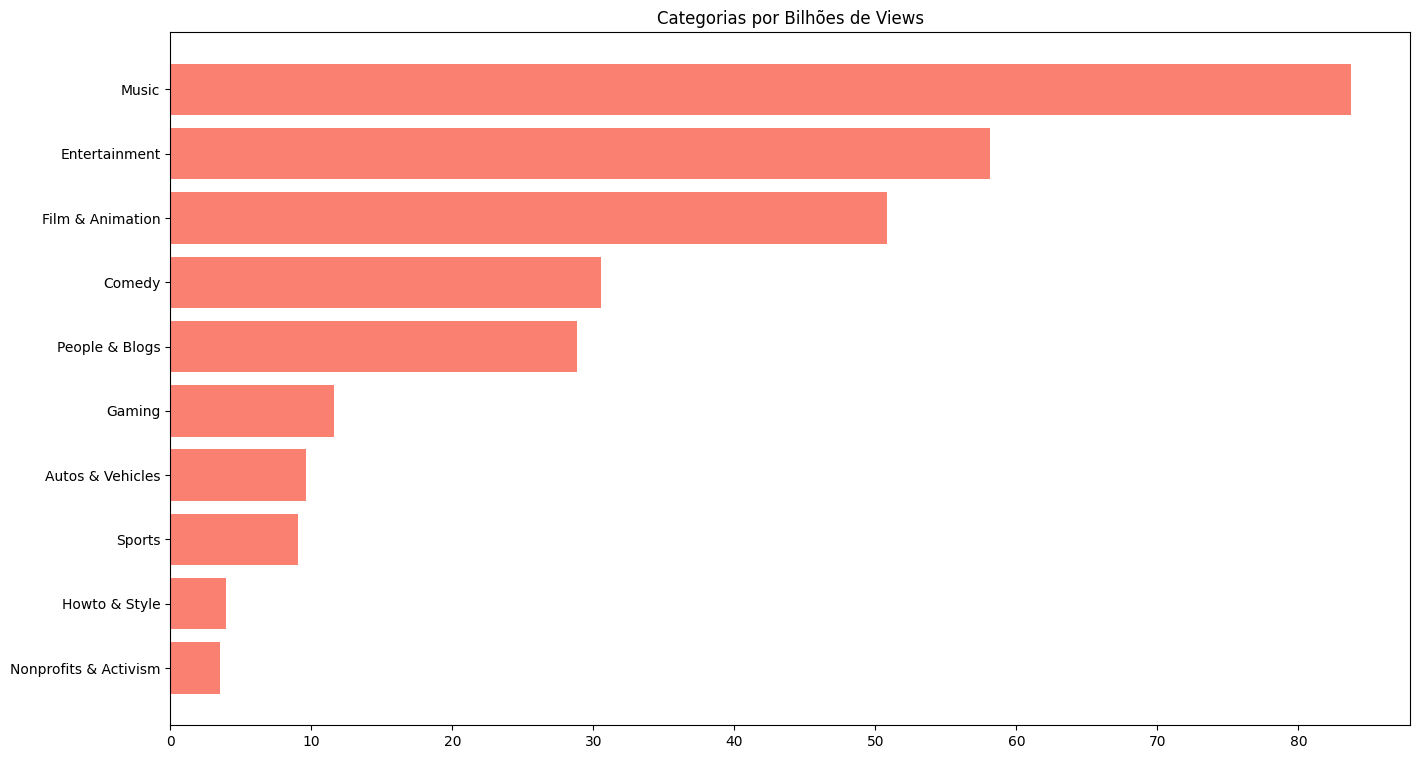

In [33]:
# Plotando Categorias por Número de Visualizações
plt.figure(figsize=(16, 9))
views_por_categoria = views_por_categoria.sort_values(by='Views_Bilhoes', ascending=True)
plt.barh(views_por_categoria['category'], views_por_categoria['Views_Bilhoes'], color='salmon')
plt.title('Categorias por Bilhões de Views')
plt.show()

Tanto na análise de inscritos quanto de visualizações, as categorias "Entertainment", "Music" e "Film & Animation" permanecem como as mais proeminentes no cenário do YouTube brasileiro. Isso sugere uma consistência nas preferências e na popularidade dessas categorias entre os criadores e espectadores.

No entanto, apesar de "Entertainment" liderar em número de inscritos, a categoria "Music" demonstra uma relevância ainda maior quando consideramos o número de visualizações. Com 83.737 bilhões de visualizações, a categoria "Music" supera "Entertainment" (58.149 bilhões) em termos de engajamento total. Isso indica que os canais de música conseguem atrair uma audiência mais ativa e gerar mais visualizações por inscrito. Canais como GR6 EXPLODE, com 25.154 bilhões de visualizações, contribuem significativamente para esse cenário. 

Essa diferença sugere que, embora "Entertainment" tenha um número maior de inscritos - pouco mais que o dobro de inscritos (201.5 milhões) em comparação com "Music" (135 milhões)-, a categoria "Music" pode ter uma conexão mais forte com a audiência em termos de interação e consumo de conteúdo, sugerindo que os canais de música conseguem mobilizar uma base de fãs mais ativa.

Categorias como "Gaming", "Autos & Vehicles", "Howto & Style", "Nonprofits & Activism" e "Sports" têm representações mais modestas em ambas as análises. Isso sugere que, embora essas categorias possam ter uma presença mais limitada, a discrepância entre inscritos e visualizações pode indicar que alguns desses canais atraem uma audiência altamente engajada, mesmo que menos numerosa.

Essa análise ressalta a importância de considerar não apenas o número absoluto de inscritos, mas também o envolvimento e a interação da audiência, fatores cruciais para determinar a relevância de uma categoria no cenário do YouTube brasileiro.

### Uploads

In [34]:
# Canais por Uploads
maiores_canaisbr_por_uploads = df_Brazil[['Youtuber', 'uploads', 'category']].sort_values('uploads', ascending=False).head(10).reset_index(drop=True)
maiores_canaisbr_por_uploads.rename(columns={'Youtuber': 'Canal', 'uploads': 'Uploads'}, inplace=True)
maiores_canaisbr_por_uploads

,Canal,Uploads,category
0,Fatos Desconhecidos,6262,Entertainment
1,Jazzghost,5494,Gaming
2,MK MUSIC,5105,Music
3,Bispo Bruno Leonardo,4891,Nonprofits & Activism
4,Pastor Antï¿½ï¿½ï¿½ï¿½ï,4712,People & Blogs
5,Felipe Neto,4331,Entertainment
6,TazerCraft,4175,Gaming
7,Camila Loures,3978,Music
8,Renato Garcia YT,3956,Entertainment
9,Enaldinho,3654,Comedy


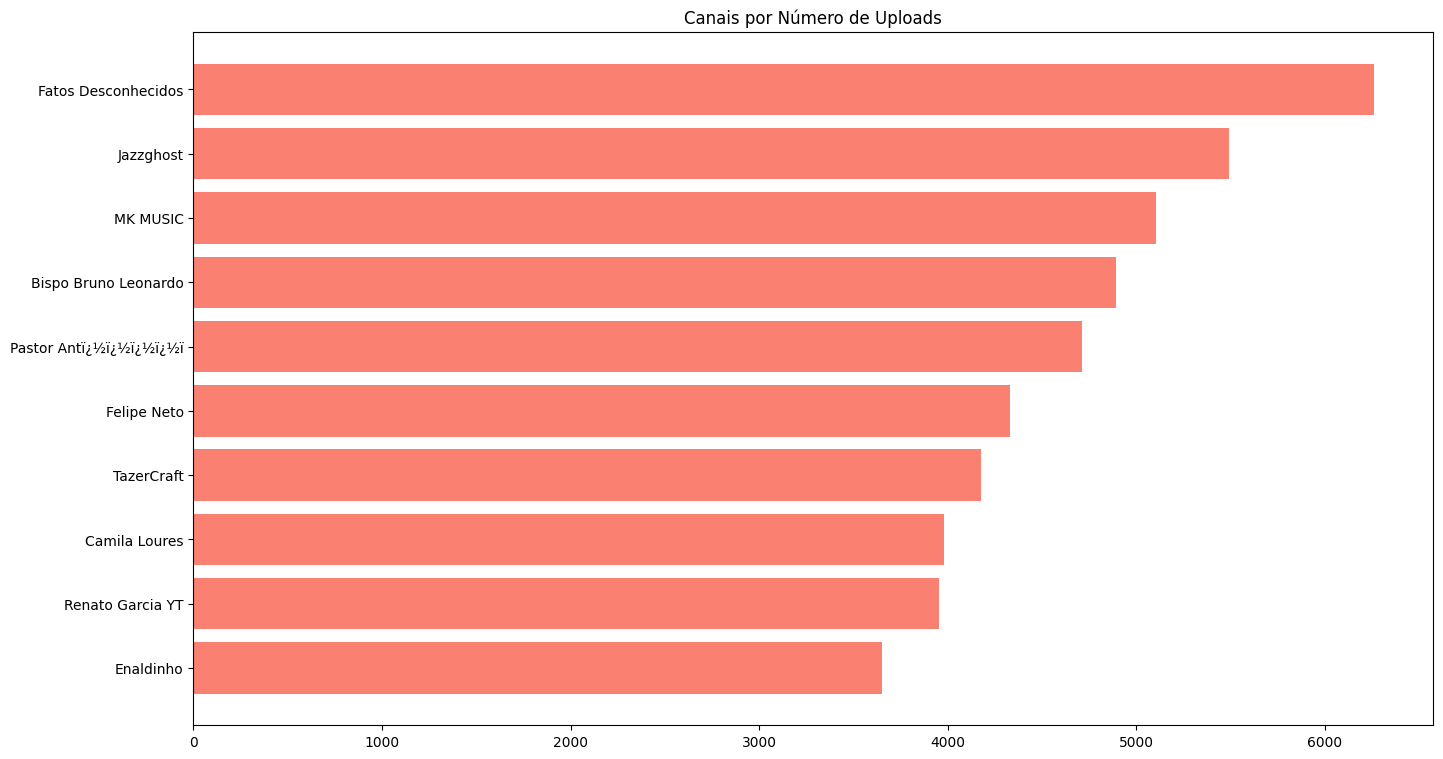

In [36]:
# Plotando Canais por Número de Uploads
plt.figure(figsize=(16, 9))
maiores_canaisbr_por_uploads = maiores_canaisbr_por_uploads.sort_values(by='Uploads', ascending=True)
plt.barh(maiores_canaisbr_por_uploads['Canal'], maiores_canaisbr_por_uploads['Uploads'], color='salmon')
plt.title('Canais por Número de Uploads')
plt.show()

### Receita

In [38]:
# Receita Anual por Categoria
receita_por_categoria = df_Brazil.groupby('category')['highest_yearly_earnings'].sum().sort_values(ascending=False).reset_index()
receita_por_categoria['Receita_Milhoes'] = (receita_por_categoria['highest_yearly_earnings'] / 1000000)
receita_por_categoria

,category,highest_yearly_earnings,Receita_Milhoes
0,Music,112900000.000,112.900
1,Comedy,56800000.000,56.800
2,Entertainment,29900000.000,29.900
3,Film & Animation,28400000.000,28.400
4,Sports,26500000.000,26.500
5,People & Blogs,15700000.000,15.700
6,Autos & Vehicles,9300000.000,9.300
7,Nonprofits & Activism,7200000.000,7.200
8,Gaming,7000000.000,7.000
9,Howto & Style,2600000.000,2.600


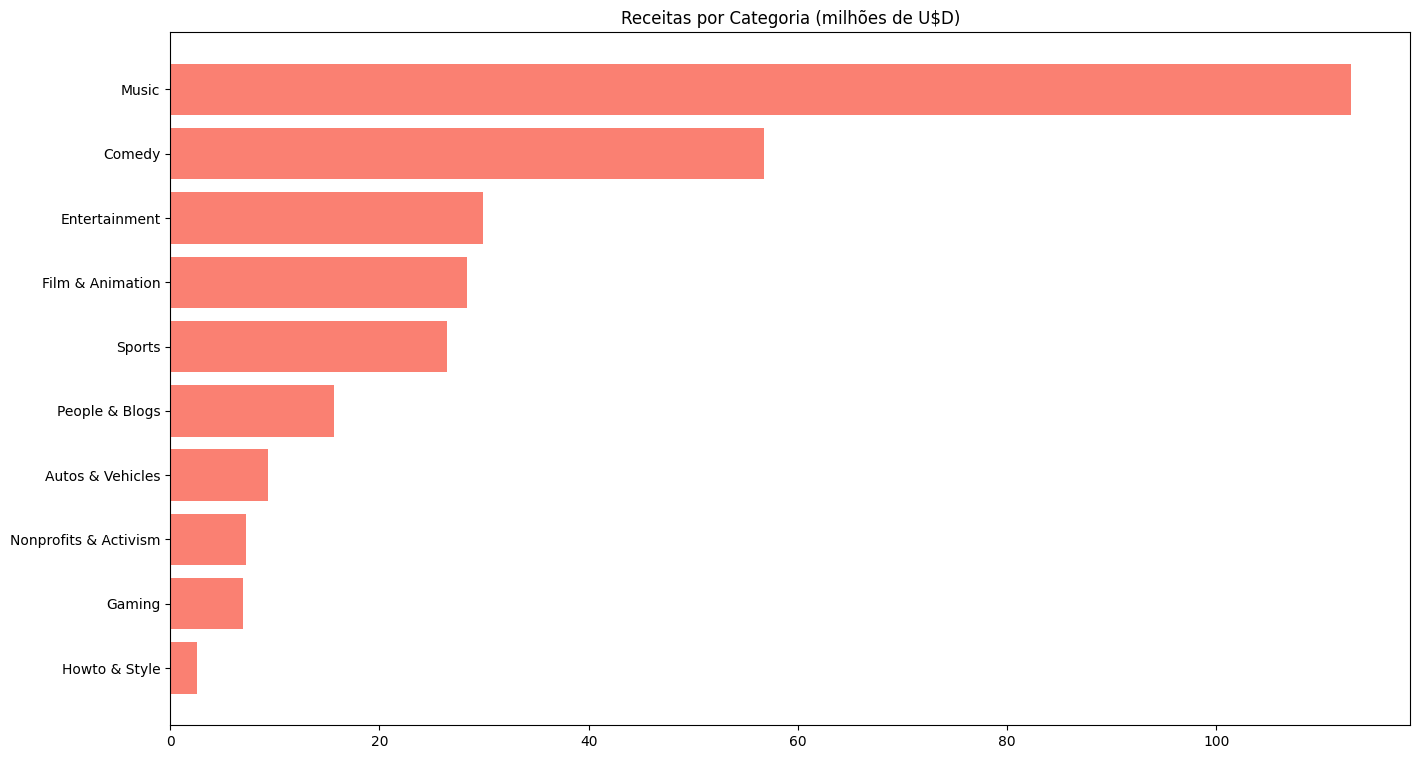

In [40]:
# Plotando Receitas por Categoria
plt.figure(figsize=(16, 9))
receita_por_categoria = receita_por_categoria.sort_values(by='Receita_Milhoes', ascending=True)
plt.barh(receita_por_categoria['category'], receita_por_categoria['Receita_Milhoes'], color='salmon')
plt.title('Receitas por Categoria (milhões de U$D)')
plt.show()

O gráfico destaca as categorias de canais no YouTube brasileiro com base em suas receitas anuais mais altas. Destaques incluem a liderança expressiva da categoria "Music" com 112,9 milhões, seguida por "Comedy" e "Entertainment".

A rentabilidade destacada pela categoria "Comedy" e "Sports" em termos de receita anual mais alta, mesmo não estando no top 3 em termos de inscritos e visualizações, sugere que os canais de comédia e esportes têm uma capacidade considerável de monetização por meio de outras fontes, como anúncios, patrocínios ou parcerias.

Essa situação pode indicar que, embora a categoria não tenha alcançado os maiores números de público, a natureza do conteúdo de comédia e esportiva atrai um público específico ou engajado, o que pode ser mais valioso para anunciantes e patrocinadores. Isso destaca a importância de considerar não apenas as métricas de popularidade, como inscritos e visualizações, mas também a capacidade de um público-alvo específico gerar receita para os criadores de conteúdo.

In [41]:
# Maiores Receitas dos Canais
maiores_receitas = df_Brazil[['Youtuber','highest_yearly_earnings','category']].sort_values('highest_yearly_earnings', ascending=False).head(10).reset_index(drop=True)
maiores_receitas.columns = ['Canal', 'Maior receita Anual', 'Categoria']
maiores_receitas['Receita_Milhoes'] = (maiores_receitas['Maior receita Anual'] / 1000000)
maiores_receitas

,Canal,Maior receita Anual,Categoria,Receita_Milhoes
0,GR6 EXPLODE,78500000.000,Music,78.500
1,Spider Slack,36500000.000,Comedy,36.500
2,Natan por Aï¿,26500000.000,Sports,26.500
3,Galinha Pintadinha,19400000.000,Film & Animation,19.400
4,Enaldinho,14500000.000,Comedy,14.500
5,Maria Clara & JP,12100000.000,People & Blogs,12.100
6,Gusttavo Lima Oficial,10300000.000,Music,10.300
7,Mundo Bita,10300000.000,Music,10.300
8,DUDU e CAROL,9300000.000,Autos & Vehicles,9.300
9,Bispo Bruno Leonardo,7200000.000,Nonprofits & Activism,7.200


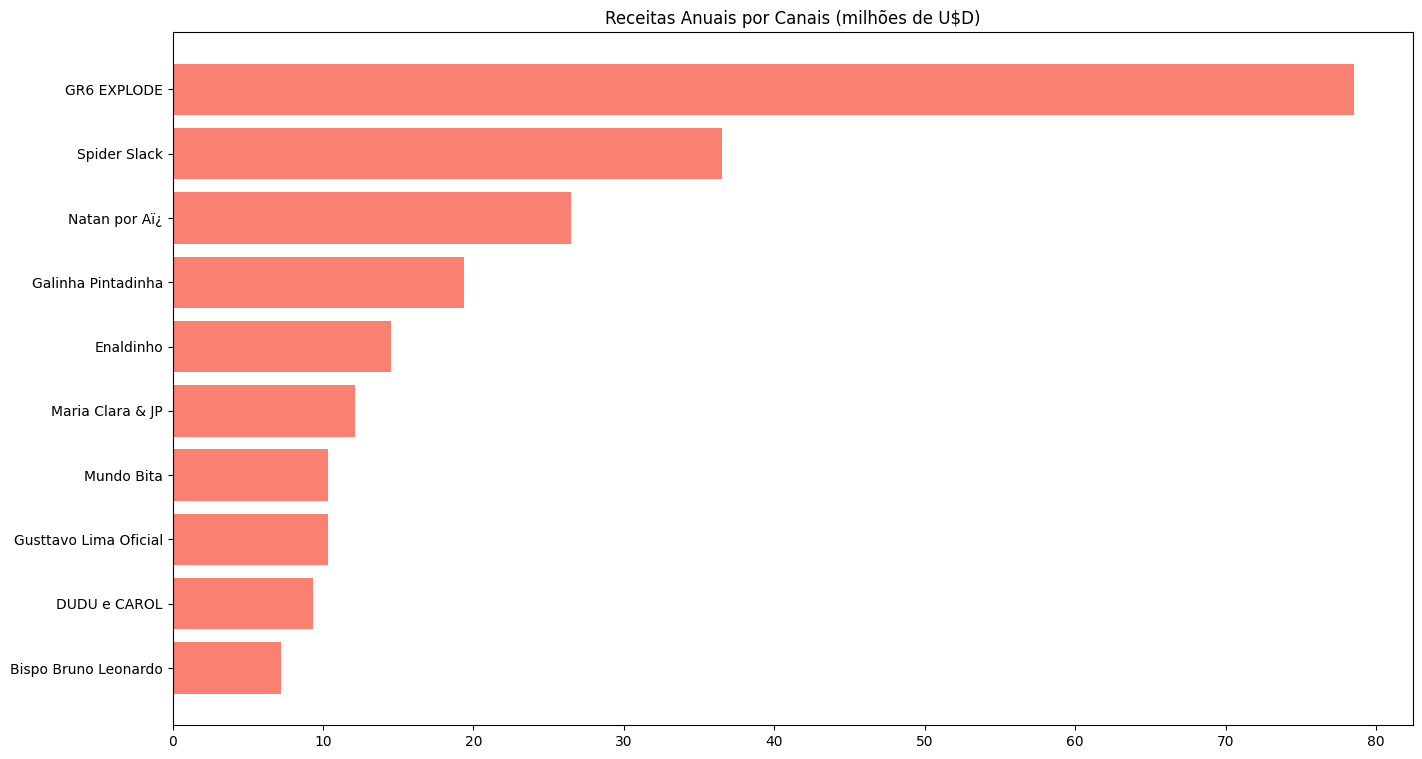

In [43]:
# Plotando Maiores Receitas Anuais por Canais
plt.figure(figsize=(16, 9))
maiores_receitas = maiores_receitas.sort_values(by='Receita_Milhoes', ascending=True)
plt.barh(maiores_receitas['Canal'], maiores_receitas['Receita_Milhoes'], color='salmon')
plt.title('Receitas Anuais por Canais (milhões de U$D)')
plt.show()

## Análise Inferencial

#### Correlações

In [37]:
corr_uploads_inscritos = df_Brazil['uploads'].corr(df['subscribers'])
print(f"A correlação entre uploads e inscritos é: {corr_uploads_inscritos}")

corr_uploads_views = df_Brazil['uploads'].corr(df['video views'])
print(f"A correlação entre uploads e visualizações é: {corr_uploads_views}")

corr_uploads_receita = df_Brazil['uploads'].corr(df['highest_yearly_earnings'])
print(f"A correlação entre uploads e receita é: {corr_uploads_receita}")

corr_inscritos_views = df_Brazil['subscribers'].corr(df_Brazil['video views'])
print(f"A correlação entre inscritos e visualizações é: {corr_inscritos_views}")

corr_views_receita = df_Brazil['video views'].corr(df_Brazil['highest_yearly_earnings'])
print(f"A correlação entre visualizações e receita é: {corr_views_receita}")

A correlação entre uploads e inscritos é: 0.03389394300691345
A correlação entre uploads e visualizações é: -0.22049561884335236
A correlação entre uploads e receita é: -0.06323431737536629
A correlação entre inscritos e visualizações é: 0.6366596888924079
A correlação entre visualizações e receita é: 0.6358879043387325



Os resultados indicam que, no contexto brasileiro do YouTube:

1. Existe uma relação substancialmente positiva entre o número de inscritos e o número de visualizações.
2. Também há uma relação substancialmente positiva entre o número de visualizações e a receita gerada.
3. Não há uma relação significativa do número de uploads sobre o número de inscritos.
4. No entanto, um grande número de uploads está associado a uma relação negativa, ainda que fraca, no número de visualizações e no faturamento.

Essas observações podem ser úteis para entender as dinâmicas de crescimento e receita para criadores de conteúdo no YouTube no Brasil, destacando a importância das interações dos usuários (inscritos e visualizações) e sugerindo que a quantidade de uploads pode ter efeitos limitados ou até mesmo negativos em determinados casos.

É sempre importante lembrar que correlação não implica causalidade. Mesmo que haja correlação, não podemos afirmar que uma variável causa diretamente a outra. Dessa forma, realizaremos testes de hipóteses para verificar se as correlações são estatisticamente significativas.

In [52]:
# uploads e inscritos
corr, p_value = pearsonr(df_Brazil['uploads'], df_Brazil['subscribers'])
print(f"A correlação entre uploads e inscritos é: {corr}, p-value: {p_value}")

alfa = 0.05  # Nível de significância
if p_value < alfa:
    print("A correlação é estatisticamente significativa")
else:
    print("A correlação não é estatisticamente significativa")

A correlação entre uploads e inscritos é: 0.03389394300691345, p-value: 0.8514631103195428
A correlação não é estatisticamente significativa


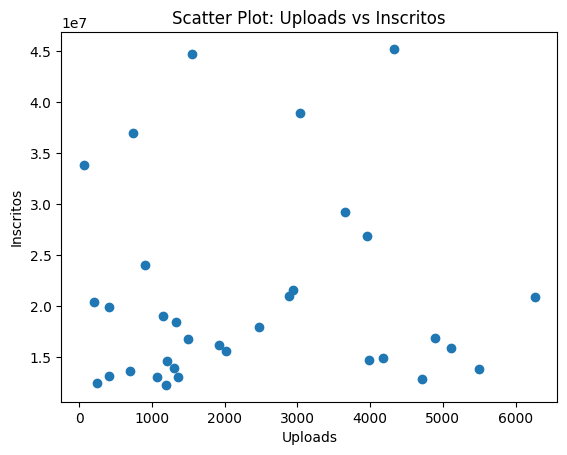

In [57]:
# Plotando correlação
plt.scatter(df_Brazil['uploads'], df_Brazil['subscribers'])
plt.title('Scatter Plot: Uploads vs Inscritos')
plt.xlabel('Uploads')
plt.ylabel('Inscritos')
plt.show()

In [54]:
# inscritos e visualizações
corr, p_value = pearsonr(df_Brazil['subscribers'], df_Brazil['video views'])
print(f"A correlação entre inscritos e visualizações é: {corr}, p-value: {p_value}")

alfa = 0.05  # Nível de significância
if p_value < alfa:
    print("A correlação é estatisticamente significativa")
else:
    print("A correlação não é estatisticamente significativa")

A correlação entre inscritos e visualizações é: 0.6366596888924081, p-value: 6.799060566666544e-05
A correlação é estatisticamente significativa


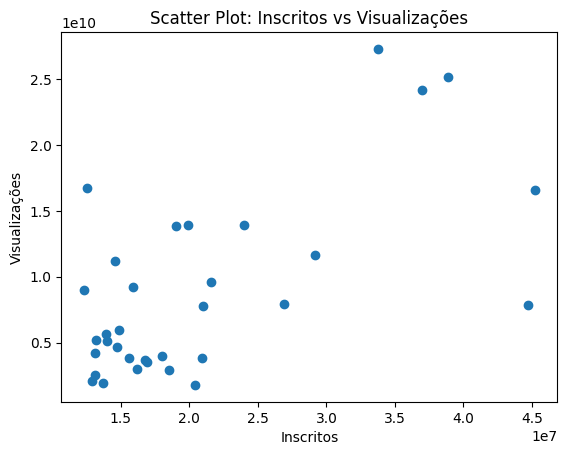

In [56]:
# Plotando correlação
plt.scatter(df_Brazil['subscribers'], df_Brazil['video views'])
plt.title('Scatter Plot: Inscritos vs Visualizações')
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.show()

In [58]:
# visualizações e receita
corr, p_value = pearsonr(df_Brazil['video views'], df_Brazil['highest_yearly_earnings'])
print(f"A correlação entre visualizações e receita é: {corr}, p-value: {p_value}")

alfa = 0.05  # Nível de significância
if p_value < alfa:
    print("A correlação é estatisticamente significativa")
else:
    print("A correlação não é estatisticamente significativa")

A correlação entre visualizações e receita é: 0.6358879043387328, p-value: 6.982616123498007e-05
A correlação é estatisticamente significativa


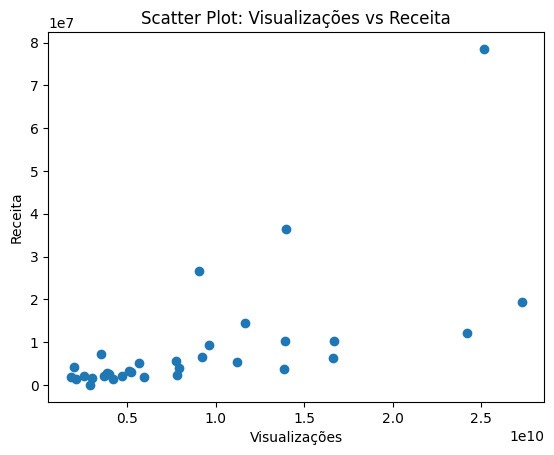

In [59]:
# Plotando correlação
plt.scatter(df_Brazil['video views'], df_Brazil['highest_yearly_earnings'])
plt.title('Scatter Plot: Visualizações vs Receita')
plt.xlabel('Visualizações')
plt.ylabel('Receita')
plt.show()

In [60]:
# uploads e receita
corr, p_value = pearsonr(df_Brazil['uploads'], df_Brazil['highest_yearly_earnings'])
print(f"A correlação entre uploads e receita é: {corr}, p-value: {p_value}")

alfa = 0.05  # Nível de significância
if p_value < alfa:
    print("A correlação é estatisticamente significativa")
else:
    print("A correlação não é estatisticamente significativa")

A correlação entre uploads e receita é: -0.0632343173753663, p-value: 0.7266410000002772
A correlação não é estatisticamente significativa


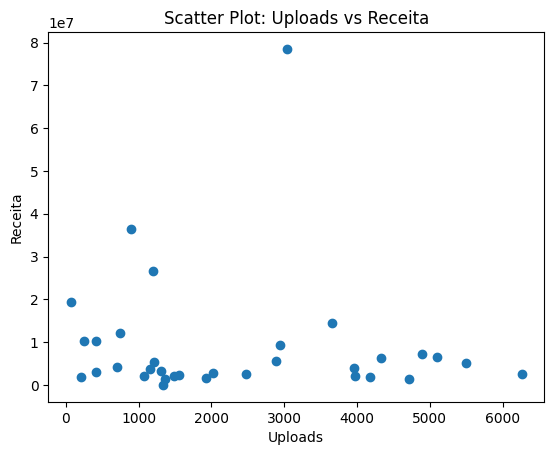

In [61]:
# Plotando correlação
plt.scatter(df_Brazil['uploads'], df_Brazil['highest_yearly_earnings'])
plt.title('Scatter Plot: Uploads vs Receita')
plt.xlabel('Uploads')
plt.ylabel('Receita')
plt.show()

In [62]:
# uploads e visualizações
corr, p_value = pearsonr(df_Brazil['uploads'], df_Brazil['video views'])
print(f"A correlação entre uploads e visualizações é: {corr}, p-value: {p_value}")

alfa = 0.05  # Nível de significância
if p_value < alfa:
    print("A correlação é estatisticamente significativa")
else:
    print("A correlação não é estatisticamente significativa")

A correlação entre uploads e visualizações é: -0.22049561884335245, p-value: 0.2175550353508271
A correlação não é estatisticamente significativa


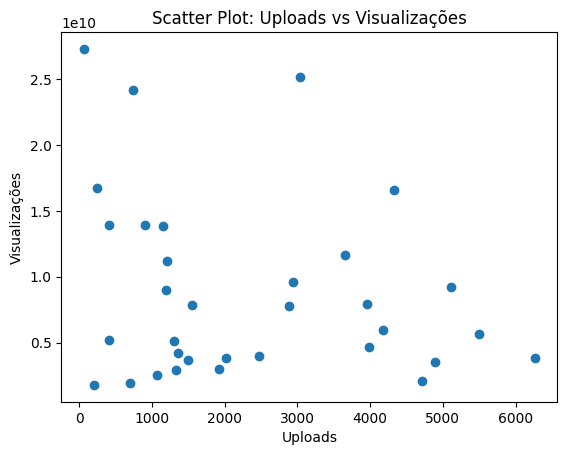

In [63]:
# Plotando correlação
plt.scatter(df_Brazil['uploads'], df_Brazil['video views'])
plt.title('Scatter Plot: Uploads vs Visualizações')
plt.xlabel('Uploads')
plt.ylabel('Visualizações')
plt.show()